In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re
import pickle
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Softmax


PROCESSEDDIR = r"C:\Users\feroc\OneDrive - The University of Melbourne\Dataset\processed_data"
NUM_CLASSES= 5 




# XPATH = os.path.join(PROCESSEDDIR, r'X_train_130x174.pickle'); YPATH = os.path.join(PROCESSEDDIR, r'y_train_130x174.pickle'); IMGWIDTH,IMGHEIGHT = (130, 174)
XPATH = os.path.join(PROCESSEDDIR, r'X_train_260x348.pickle'); YPATH = os.path.join(PROCESSEDDIR, r'y_train_260x348.pickle'); IMGWIDTH,IMGHEIGHT = (260, 348)
# XPATH = os.path.join(PROCESSEDDIR, r'X_train_520x696.pickle'); YPATH = os.path.join(PROCESSEDDIR, r'y_train_520x696.pickle'); IMGWIDTH,IMGHEIGHT = (520, 696)





with open(XPATH, 'rb') as X_train:
    X_train = pickle.load(X_train)
    
with open(YPATH, 'rb') as y_train:
    y_train = pickle.load(y_train)
    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False, dtype=np.int)
y_train = ohe.fit_transform(y_train.reshape(-1,1))   

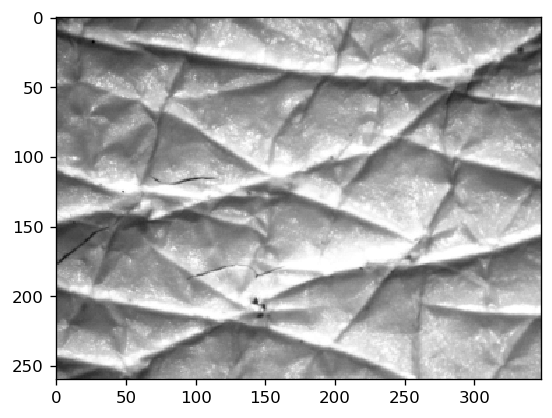

array([0, 1, 0, 0, 0])

In [6]:
# verify
img_num = np.random.randint(np.random.randint(563))
fig, ax = plt.subplots(dpi=120)
plt.imshow(X_train[img_num].reshape(-1,IMGWIDTH,IMGHEIGHT)[0]*255,cmap='gray')
plt.show()
y_train[img_num]

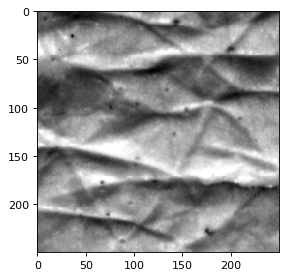

In [199]:
fig, ax = plt.subplots(dpi=80)
plt.imshow(tf.image.random_crop(X_train[0], (250,250,1)).numpy().reshape(250,250)*255,cmap='gray')
plt.show()

In [69]:
tf.keras.utils.normalize(X_train.reshape(-1,IMGWIDTH,IMGHEIGHT)*255, axis = 0)

array([[[0.03500705, 0.03448502, 0.03385424, ..., 0.04725715,
         0.04758471, 0.04829696],
        [0.03472041, 0.03444376, 0.03430359, ..., 0.04723841,
         0.04736014, 0.04784083],
        [0.03415334, 0.03453068, 0.03463795, ..., 0.04766578,
         0.0474432 , 0.04752302],
        ...,
        [0.03665456, 0.03704609, 0.03747368, ..., 0.0425069 ,
         0.04335785, 0.04398641],
        [0.03643247, 0.0371139 , 0.03761346, ..., 0.04326148,
         0.04393408, 0.04454922],
        [0.03654444, 0.03722833, 0.03779425, ..., 0.04364012,
         0.04392939, 0.04451347]],

       [[0.03850776, 0.03957677, 0.0402591 , ..., 0.03504717,
         0.03743631, 0.03994655],
        [0.03655991, 0.03719926, 0.03727656, ..., 0.03412919,
         0.03608392, 0.03858859],
        [0.03529178, 0.0354454 , 0.03532612, ..., 0.03298201,
         0.03456576, 0.03666061],
        ...,
        [0.04253739, 0.04337103, 0.04402029, ..., 0.04427802,
         0.04380028, 0.04376426],
        [0.0

In [64]:
tf.keras.utils.normalize(X_train, axis=0)

array([[[[0.03500705],
         [0.03448502],
         [0.03385424],
         ...,
         [0.04725715],
         [0.04758471],
         [0.04829696]],

        [[0.03472041],
         [0.03444376],
         [0.03430359],
         ...,
         [0.04723841],
         [0.04736014],
         [0.04784083]],

        [[0.03415334],
         [0.03453068],
         [0.03463795],
         ...,
         [0.04766578],
         [0.0474432 ],
         [0.04752302]],

        ...,

        [[0.03665456],
         [0.03704609],
         [0.03747368],
         ...,
         [0.0425069 ],
         [0.04335785],
         [0.04398641]],

        [[0.03643247],
         [0.0371139 ],
         [0.03761346],
         ...,
         [0.04326148],
         [0.04393408],
         [0.04454922]],

        [[0.03654444],
         [0.03722833],
         [0.03779425],
         ...,
         [0.04364012],
         [0.04392939],
         [0.04451347]]],


       [[[0.03850776],
         [0.03957677],
         [0.04

In [2]:
# try normalising
# we should not normalise accross all images, coz that may distort an image itself

# rather, we may normalise "within image"
# i.e. flatten -> normalise -> reshape

# X_train =  tf.keras.utils.normalize(X_train, axis=0)

# and try cropping (random)


# by the way, save cropped images or generate them on the fly?
# for efficiency, probably save them

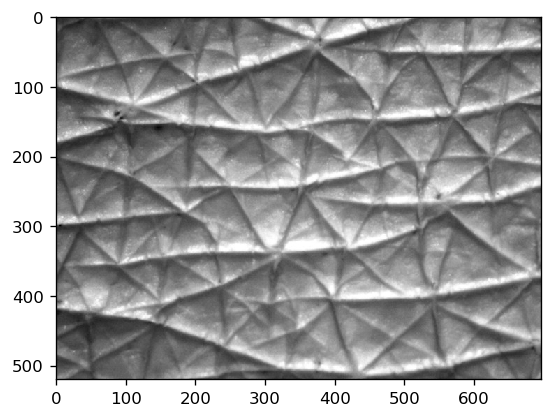

array([0, 1, 0, 0, 0])

In [202]:
fig, ax = plt.subplots(dpi=120)
plt.imshow(X_train[1].reshape(-1,IMGWIDTH,IMGHEIGHT)[0]*255,cmap='gray')
plt.show()
y_train[0]

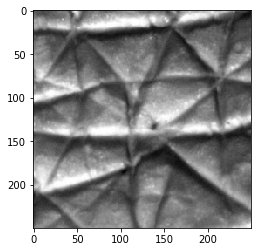

In [203]:
plt.imshow(tf.image.random_crop(X_train[0:2], (2,250,250,1)).numpy()[1].reshape(250,250)*255,cmap='gray')
plt.show()

563

In [ ]:
# Models

In [5]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('sigmoid'))

          
# model.add(Dense(32))
# model.add(Activation('sigmoid'))
          
# model.add(Dense(5))
# model.add(Activation('softmax'))

# model.compile(loss="categorical_crossentropy",
#               optimizer='adam',
#               metrics=['accuracy'])

In [2]:
init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=30027)

model = Sequential()
model.add(Conv2D(64, (5, 5), padding='same',
                 input_shape=X_train.shape[1:]
#                  , kernel_initializer=init, bias_initializer=init
                ))
model.add(Activation('relu'))




model.add(Conv2D(64, (5, 5)
#                  , kernel_initializer=init, bias_initializer=init
                ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))




model.add(Conv2D(128, (5, 5), padding='valid'
#                  , kernel_initializer=init, bias_initializer=init
                ))
model.add(Activation('elu'))




model.add(Conv2D(128, (5, 5)
#                  , kernel_initializer=init, bias_initializer=init
                ))
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))




model.add(Flatten())
# model.add(Dense(512, kernel_initializer=init, bias_initializer=init))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))


model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.25))


model.add(Dense(256))
model.add(Activation('elu'))
model.add(Dropout(0.25))


# model.add(Dense(64, kernel_initializer=init, bias_initializer=init))
# model.add(Activation('elu'))
# model.add(Dropout(0.125))


model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='kullback_leibler_divergence',
              optimizer='adam',
              metrics=['categorical_accuracy'])

In [3]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=X_train.shape[1:]),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(64, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'),
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(32, activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'),
#     tf.keras.layers.Dropout(0.125),
#     tf.keras.layers.Dense(5, activation='softmax')
# ])

# # opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# model.compile(optimizer='adam', loss='kullback_leibler_divergence', metrics=['mae', 'acc'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 260, 348, 64)      1664      
_________________________________________________________________
activation (Activation)      (None, 260, 348, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 344, 64)      102464    
_________________________________________________________________
activation_1 (Activation)    (None, 256, 344, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 114, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 114, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 81, 110, 128)      2

In [ ]:
model.fit(X_train, y_train, batch_size=15, epochs=200, validation_split=0.1, shuffle=True)

Train on 506 samples, validate on 57 samples
Epoch 1/200
506/506 [==============================] - 3s 7ms/sample - loss: 1.6231 - categorical_accuracy: 0.2510 - val_loss: 1.5684 - val_categorical_accuracy: 0.2632
Epoch 2/200
506/506 [==============================] - 3s 7ms/sample - loss: 1.5965 - categorical_accuracy: 0.2352 - val_loss: 1.7164 - val_categorical_accuracy: 0.2632
Epoch 3/200
506/506 [==============================] - 3s 7ms/sample - loss: 1.6205 - categorical_accuracy: 0.2688 - val_loss: 1.6074 - val_categorical_accuracy: 0.2632
Epoch 4/200
506/506 [==============================] - 3s 7ms/sample - loss: 1.6259 - categorical_accuracy: 0.2352 - val_loss: 1.6087 - val_categorical_accuracy: 0.2632
Epoch 5/200
506/506 [==============================] - 3s 7ms/sample - loss: 1.6106 - categorical_accuracy: 0.2510 - val_loss: 1.6092 - val_categorical_accuracy: 0.2632
Epoch 6/200
506/506 [==============================] - 3s 7ms/sample - loss: 1.6170 - categorical_accuracy: 0.